#EXPLORATORY DATA ANALYSIS of CAPSTONE 1
#TITLE:Biomarker identification for the detection of breast cancer

Early detection of breast cancer may lead to favorable postreatment prognosis. Predictive models based on 
routine blood analysis will be helpful in developing low cost screening tools for breast cancer. 
Several candidates for biomarkers of breast cancer have been reported in the literature. In 2008 serum levels of tissue polypeptide-specific antigen, breast cancer-specific cancer antigen 15.3 (CA15–3), and insulin-like growth factor binding protein-3 (IGFBP-3) were introduced as predictors on a logistic regression. This study is aimed at exploring the potential of parameters such as Glucose, HOMA (homoeostatstic models for assement of insulin resistance), BMI, Insulin, Resistin, Adiponectin and MCP.1 (monocyte chemoattractant protein) in detecting the presence of breast cancer.

DATASET:
Dataset of 166 candidate is obtained from UCI dataset. 

In [22]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy.stats import t, ttest_ind_from_stats
from scipy.stats import mannwhitneyu
#Read CSV file using pandas
# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

df = pd.read_csv('dataR2.csv')


In [23]:
df_healthy = df[df['Classification'] == 1]
df_patient = df[df['Classification'] == 2]


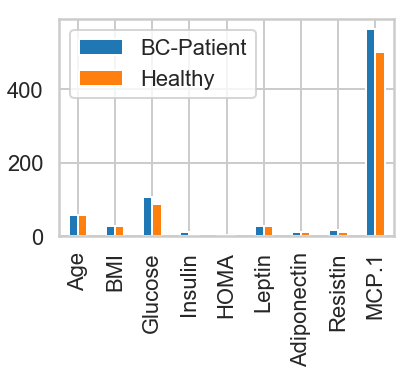

In [24]:
#Descriptive Statistics

df1 = df_healthy.drop(columns='Classification', axis=1)
df2 = df_patient.drop(columns='Classification', axis=1)
pd.concat({
    'Healthy': df1.mean(), 'BC-Patient': df2.mean()
}, axis=1).plot.bar()

Figure 1: Mean of anthropometric data and blood derived parameters obtained from healthy and patients is calculated and plotted as bar chart. 
It can be seen in the plot that patients have considerably higher values of blood glucose, Insulin, Resistin and MCP.1 and they could be important predictor in machine learning models to classify breast cancer patients.However, it is too early to conclude. In the following section, with the help of sns package i produce pair plots including the distribution of each feature. Data is labelled in a manner that blue dot corresponds to healthy individuals and patients are labelled with orange color. We can observe both the distribution and relationship between variables. 


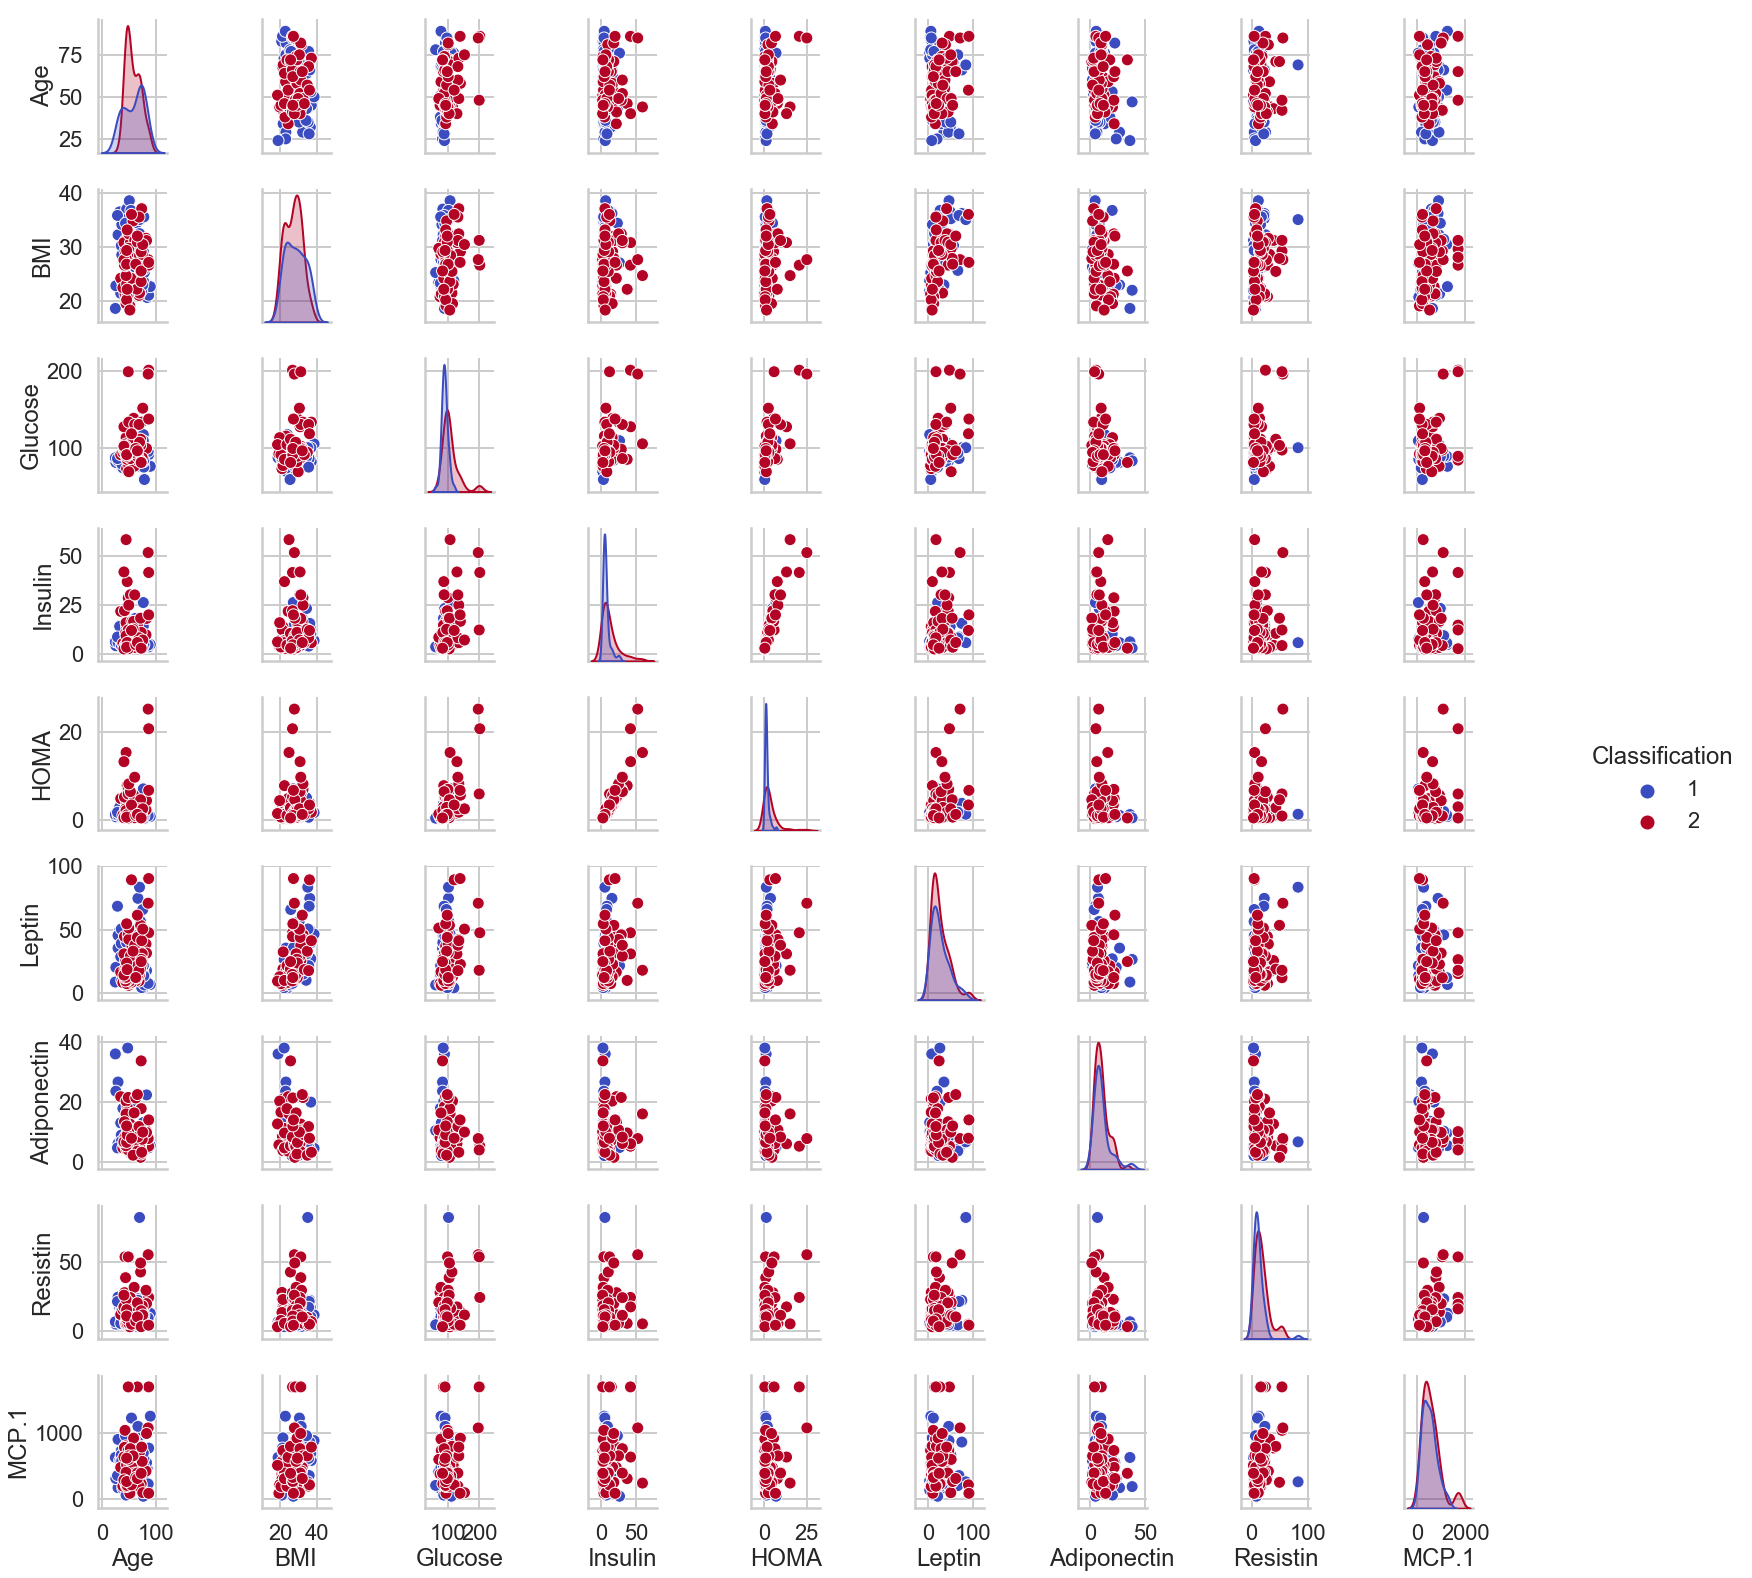

In [25]:
data = df[['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']]
#data1 = df2[['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']]

#sns.pairplot(data,plot_kws=dict(s=20, linewidth=2))
#sns.pairplot(data)

sns.pairplot(df, hue ="Classification", palette ='coolwarm') 
#for col in df.columns:
#    sns.kdeplot(df[str(col)])

#sns.pairplot(data1, plot_kws=dict(s=20, linewidth=2))


Age, BMI, MCP.1 appear to be normally distributed. Glucose, HOMA, Leptin distribution is right skewed. If we look at HOMA, Insulin scatter plot you will see a positive linear relationship and can be modelled as linear regression. Further, to understand the strength of correlation among feature. I performed correlation analysis and respresented the results in a form of heat map. 

In [26]:
#Generating a correlation matrix 
corr = df.corr()

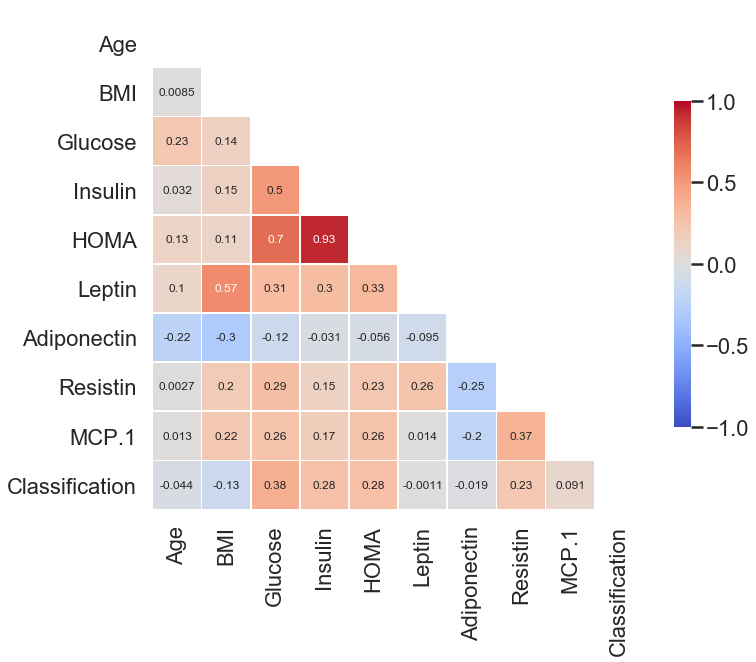

In [27]:
empty = np.zeros_like(corr, dtype=np.bool)
empty[np.triu_indices_from(empty)]= True
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr, 
                      mask = empty,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

BMI and leptin have a positive correlation of 0.57 
HOMA and Glucose are correlated with a value of 0.7
Insulin and HOMA are strongly correlated with a value of 0.93
The features could later be strong features for building machine learning models.

In [28]:
#Writing a function for calculating a t-statistic
df = pd.read_csv('dataR2.csv')
dfg= df.groupby('Classification')

#compare the means of feature Age, BMI, Glucose, Insulin, Leptin, Adiponectin, Resistin, MCP.1
n0 = dfg.count().loc[1][0]
n1 = dfg.count().loc[2][0]
print (n0, n1)
#store t-value and p-value in a dictionary
for i in df1.columns:
#    x0 = df1.mean().loc[1,str(i)]
     x0 = df1[str(i)].mean()
#    x1 = df2.mean().loc[2,str(i)]
     x1 = df2[str(i)].mean()
#    s0 = df1.mean().loc[1,str(i)]
     s0 = df1[str(i)].mean()
#    s1 = df2.mean().loc[2,str(i)]
     s1 = df2[str(i)].mean()
     std_pool = np.sqrt(((n0-1) * (s0 ** 2) + (n1-1) * (s1 ** 2)) / (n0 + n1 - 2))
     t_critical_stats, p_value_stats = ttest_ind_from_stats(x0, s0, n0, x1, s1, n1)
     print (i, p_value_stats)
     
    
    
from scipy.stats import mannwhitneyu    
    
#Now using non-parametric test for compairing the mean of the samples 
#a1= [df1['Age'][i] for i in range(len(df1))]
#print (a1)

for col in df1.columns:
    stat, p = mannwhitneyu(list(df1[str(col)]), list(df2[str(col)]))
    
   

 





52 64
Age 0.8957458462806489
BMI 0.7963190102606722
Glucose 0.3464191007594487
Insulin 0.004819731493098419
HOMA 0.00020073873318128215
Leptin 0.9933636378212817
Adiponectin 0.8885263624204628
Resistin 0.04634428925109403
MCP.1 0.5280955099416779


In [29]:
#df_n = df[['HOMA','Resistin', 'BMI','Classification']].copy()
df_n1 = df[['Glucose', 'Resistin','Age','BMI','Classification']].copy()
X = df_n1.iloc[:, 0:4].values
Y = df_n1.iloc[:, 4].values

In [30]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [31]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

[[10  2]
 [ 1 16]]
              precision    recall  f1-score   support

           1       0.91      0.83      0.87        12
           2       0.89      0.94      0.91        17

   micro avg       0.90      0.90      0.90        29
   macro avg       0.90      0.89      0.89        29
weighted avg       0.90      0.90      0.90        29



/home/lokesh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best p: 1
Best n_neighbors: 3


/home/lokesh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


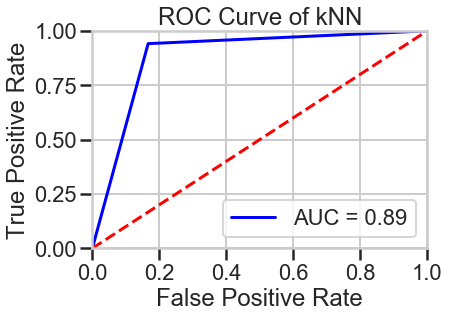

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
classifier1 = KNeighborsClassifier(n_neighbors = 5, p = 1)
model = classifier1.fit(X_train, Y_train)
Y_pred = classifier1.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
cm = confusion_matrix(Y_test, Y_pred)
print (cm)
a, b, c = roc_curve(Y_test, Y_pred, pos_label=2)
d = classification_report(Y_test, Y_pred)
print (d)
#List Hyperparameters that we want to tune.
#leaf_size = list(range(1,50))
n_neighbors = list(range(1,10))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters)
#Fit the model
best_model = clf.fit(X_train,Y_train)
#Print The value of best Hyperparameters
#print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

knn_2.fit(X_train,Y_train)

#y_scores = knn_2.predict_proba(X_test)
#fpr, tpr, threshold = roc_curve(Y_test, y_scores[:, 1])
roc_auc = auc(a, b)

plt.title('Receiver Operating Characteristic')
plt.plot(a, b, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()
